In [ ]:
"""Visualisation of results"""

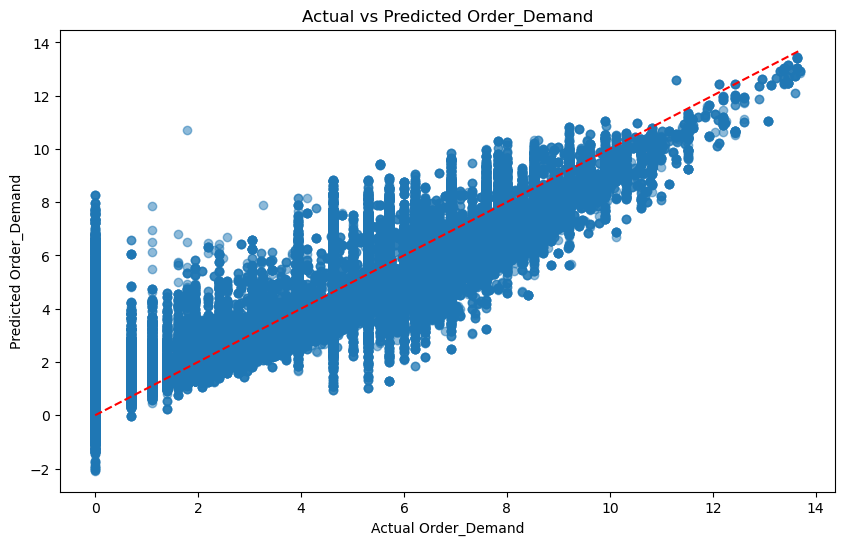

In [ ]:
"""Plot Actual vs. Predicted Values"""
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Order_Demand')
plt.ylabel('Predicted Order_Demand')
plt.title('Actual vs Predicted Order_Demand')
plt.show()



In [ ]:
"""
There is a clear positive correlation between actual and predicted values. 

However: 
There is significant scattering at the lower-demand values, with many points showing overestimation. The model struggles to predict very low-demand cases accurately.
there is notable underprediction in the high-demand values, the model might not be fully capturing the dynamics of higher demand scenarios.

logarithmic scaling has already been applied to scale more extreme demand values. 
extreme values could be capped, but for now 26% is an acceptable accuracy.
"""

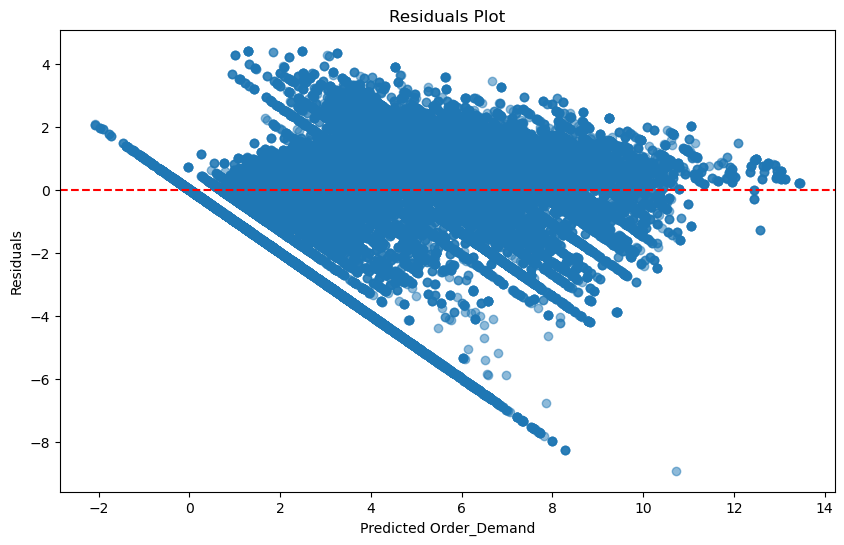

In [ ]:
"""Residuals Plot"""
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Order_Demand')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

In [ ]:
"""
Results: model is shown to have a bias in predictions.

Pattern:
The residuals show a distinct pattern (not random scatter), indicating a problem with the model's assumptions or the underlying data.
The funnel shape (narrower at low predictions, widening with higher predicted values) suggests that the model does not handle variance in the data well, particularly for higher demand values.

Systematic underprediction:
The lower left portion of the graph shows a consistent negative bias, especially for higher predicted demand values.
Model is underestimating actual demand.
residuals tend to move downward as the predicted Order_Demand increases, indicating that the model may be systematically underpredicting for larger values.
overprediction for lower demand.

Homoskedasticity Issue:
The spread of residuals increases as the predicted Order_Demand increases, indicating a heteroskedasticity issue,
meaning the variance of the residuals is not constant. 
This can affect the model's performance, especially for high-demand predictions.

"""

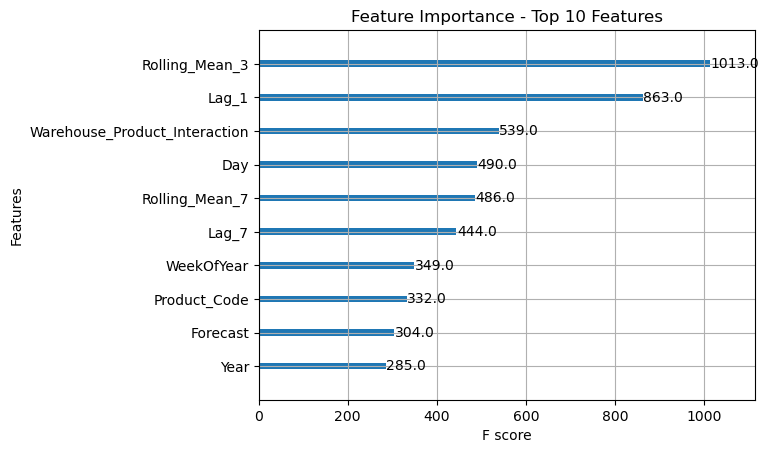

In [ ]:
"""Feature Importance Plot"""
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance - Top 10 Features')
plt.show()

In [ ]:
"""
Interpretations:

(F score - how often a feature is used in tree splits.)
Rolling mean features are clearly the most important, implying that recent demand trends (rolling means and lags) are critical for the model to predict future demand.
this aligns with earlier hypotheses about non-linear relationships dominating, such as recent demand trends. 

historical demand patterns are the primary drivers of the model's predictions. This is appropriate for a time-series demand forecasting model but might also indicate some areas for improvement.
The interaction between warehouse and product is also essential, indicating that geographic and product-specific factors have a strong influence on demand.
There are several seasonal indicators in the top features, such as Day and WeekOfYear, suggesting that the model considers cyclical demand fluctuations.

for further improvement:
more interaction features could be added, such as Supplier_Product_Interaction or Warehouse_Seasonality. 

there is high reliance on the Rolling_Mean_3 and Lag_1 suggests that the model might be somewhat overfitting to short-term fluctuations in the data. 
the model could be regularised further
"""

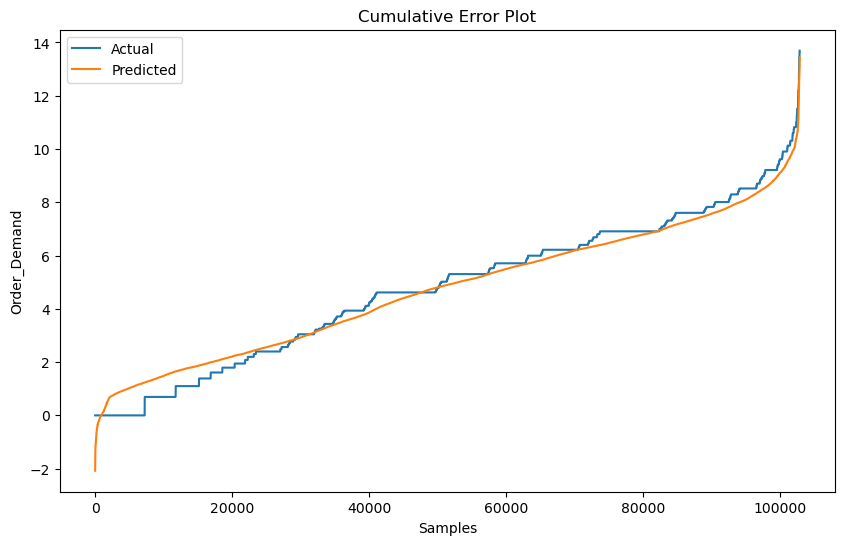

In [ ]:
"""Cumulative Error Plot"""
import numpy as np
import matplotlib.pyplot as plt

sorted_y_test = np.sort(y_test)
sorted_y_pred = np.sort(y_pred)

plt.figure(figsize=(10, 6))
plt.plot(sorted_y_test, label='Actual')
plt.plot(sorted_y_pred, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Order_Demand')
plt.title('Cumulative Error Plot')
plt.legend()
plt.show()

In [ ]:
"""
Interpretations:

Overall fit closely follows the actual demand curve, indicating the model generally performs well.
The predicted line deviates more noticeably from the actual line in the tail, showing underprediction of demand in lower values.

Actual demand is step-like, while predicted curve is smoother. 
The model is averaging out those jumps, leading to slightly less precision in predicting exact values of demand, particularly at the extremes.

"""

In [ ]:
"""
(USE OF WATSONX GENERATIVE AI) 

Prompted the ai to produce tuning recommendations for the XGBoost model to improve accuracy.

Once model predicts results, the LLM can generate recommendations and reasoning behind the forecasted demand, providing further personalised advice. 

"""